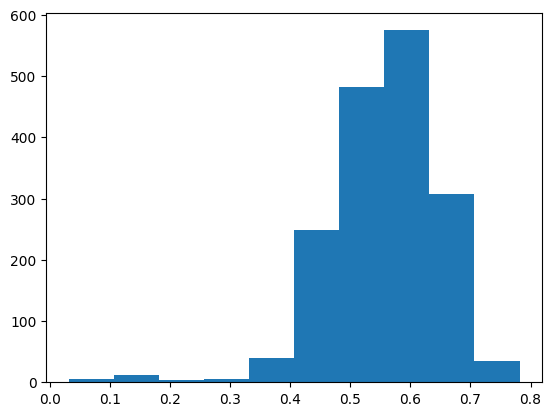

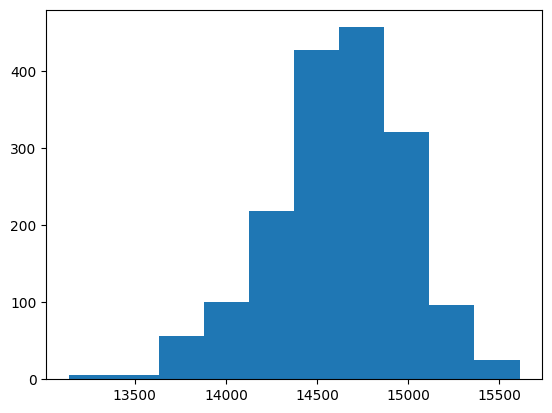

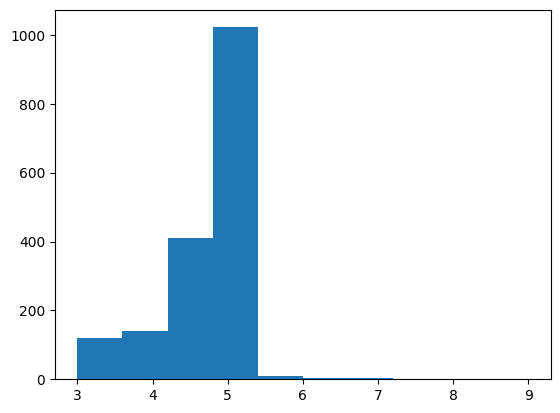

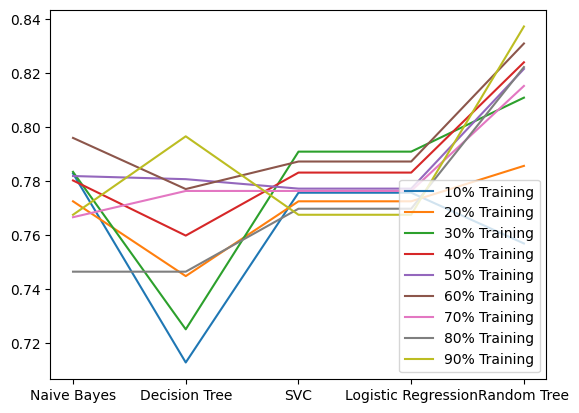

In [2]:

import numpy as np
import pandas as pd
from sklearn import *

df_o = pd.read_csv('C:\\Users\\prane\\PycharmProjects\\hacktj\\data2.csv')
df = df_o.copy()
# reduce skew
# area = df['area'].apply(lambda x: np.log(x + np.sqrt(x**2 + 1)))
df['CLASS'] = df_o['CLASS'].apply(lambda x: 0 if x == "no_fire" else 1)
df['CLASS']
from matplotlib import pyplot as plt

plt.hist(df['NDVI'])
plt.show()
plt.hist(df['LST'])
plt.show()
plt.hist(df['BURNED_AREA'])
plt.show()

classification = df['CLASS']

TEST = []
for i in range(9):
    i = i + 1
    TEST2 = []

    parameters = df.drop('CLASS', axis=1)
    train_parameters, test_parameters, train_solutions, test_solutions = model_selection.train_test_split(parameters,
                                                                                                          classification,
                                                                                                          train_size=i / 10)

    rf = naive_bayes.GaussianNB()
    rf.fit(train_parameters, train_solutions)
    TEST2.append(metrics.accuracy_score(test_solutions, rf.predict(test_parameters)))

    rf = tree.DecisionTreeClassifier()
    rf.fit(train_parameters, train_solutions)
    TEST2.append(metrics.accuracy_score(test_solutions, rf.predict(test_parameters)))

    rf = svm.SVC()
    rf.fit(train_parameters, train_solutions)
    TEST2.append(metrics.accuracy_score(test_solutions, rf.predict(test_parameters)))

    rf = linear_model.LogisticRegression()
    rf.fit(train_parameters, train_solutions)
    TEST2.append(metrics.accuracy_score(test_solutions, rf.predict(test_parameters)))

    # Create a Random Forest classifier model
    rf = ensemble.RandomForestClassifier(n_estimators=101, random_state=42)
    rf.fit(train_parameters, train_solutions)
    TEST2.append(metrics.accuracy_score(test_solutions, rf.predict(test_parameters)))

    TEST.append(TEST2)
TEST

# TESTT = np.linalg.inv(np.array(TEST))
labels = label = ["Naive Bayes", "Decision Tree", "SVC", "Logistic Regression", "Random Tree"]
plt.plot(label, TEST[0], label="10% Training")
plt.plot(label, TEST[1], label="20% Training")
plt.plot(label, TEST[2], label="30% Training")
plt.plot(label, TEST[3], label="40% Training")
plt.plot(label, TEST[4], label="50% Training")
plt.plot(label, TEST[5], label="60% Training")
plt.plot(label, TEST[6], label="70% Training")
plt.plot(label, TEST[7], label="80% Training")
plt.plot(label, TEST[8], label="90% Training")
# plt.plot(label, TEST[9], label="100% Training")
plt.legend(loc="lower right")
plt.show()